#Analysis of Education Inequality
https://data.mendeley.com/datasets/5b82ytz489/1

CMSC 320 · Fall 2025 Final Project Tutorial

### Contributions

<div align="center">

| Member           | Section             | Summary |
| :--------------- | :------------------ | :------ |
| Aadhitya Ashok   | C, F, D             | Assisted with Data Exploration (C); Outlined approaches algorithmic design (D); Supported <br> formulation of 2 of the 3 conclusions (F)|
| Ahtesham Alvi    | A, B, C, D, E, F, G | Created files & Managed liveshare (A); Wrote code for Data handling (cleaning, processing, <br> etc.) (B); Wrote all code for summary statistics, Code & Analysis for Hypothesis I (C); Feature <br> Creation & Data Imputation for ML Modeling (D); ML model selection, testing, & tuning (E); <br> ML models analysis/explanation & all feature analysis code and explanation (F); Notebook <br> conversion & Markdown for Final Tutorial (G)|
| James Crabtree   | B, C, D             | Assisted Data pre-processing (B); Assisted data exploration & Summary Statistics (C); <br> Assisted selection of ML Algorithm and developing the three hypothesis (D)|
| Ryan Bastianelli | A, C, D, E, F       | Found Current Dataset (A); Code & Analysis for Hypothesis III (C); ML Workflow & <br> Visualization for Modeling (D); ML models selection & testing (E); ML models analysis/<br>explanation (F)|
| Yaseen Khan      | A, B, C             | Topic Suggeston (A); Wrote code for Data Processing (B); Code & Analysis for Hypothesis II <br>(C); Notebook Conversion & Formatting for Summary Statistics & Exploration (F)|

</div>

### Introduction
Our topic involves something which involves a familiar stakeholder: that being students. As individuals who are currently studying in a nationally well-recognized institution, we noticed that educational outcomes aren’t always distributed evenly across different groups of learners. Some students tend to thrive academically, but others can struggle; these differences can often be connected to Attendance, Preparation Hours, Gaming Hours, and more. In the end, these observations drive our analysis of educational inequality. The central questions we aim to answer are the following:
* Is there a correlation between high school and college GPA?
* Can high school information be used to predict cumulative GPA?
* Is there a way to potentially look at all features and understanding if they predict a particular feature (ie. cumulative GPA)?

Answering these questions are key as these analyses reflect real challenges that we, as students, might face. Understanding more into balancing academics with extracurricular activities, and understanding high school performance are important to see if they potentially tie into the academic discrepancy among students.  

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance, PartialDependenceDisplay


In [23]:
#Just for google colab
#url = "https://raw.githubusercontent.com/AhteshamAlvi/Education-Inequality-320/main/ResearchInformation3.csv"
#df = pd.read_csv(url)

df = pd.read_csv("ResearchInformation3.csv")

rows, cols = df.shape

print(f"Dataset Shape: {df.shape}")
print(f"Features: {cols}")
print(f"Samples: {rows}")

print("\nPreview:")
display(df.head())

Dataset Shape: (493, 16)
Features: 16
Samples: 493

Preview:


,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall
0,Business Administration,Male,4.17,4.84,"Low (Below 15,000)",Village,3,More than 3 Hours,0-1 Hour,80%-100%,No,3,Yes,6th,3.220,3.350
1,Business Administration,Female,4.92,5.00,"Upper middle (30,000-50,000)",City,3,0-1 Hour,0-1 Hour,80%-100%,No,3,Yes,7th,3.467,3.467
2,Business Administration,Male,5.00,4.83,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,More than 3 Hours,80%-100%,No,4,Yes,3rd,4.000,3.720
3,Business Administration,Male,4.00,4.50,"High (Above 50,000)",City,5,More than 3 Hours,More than 3 Hours,80%-100%,No,5,Yes,4th,3.800,3.750
4,Business Administration,Female,2.19,3.17,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,2-3 Hours,80%-100%,No,3,Yes,4th,3.940,3.940


Dataset: Student Performance Metrics Dataset <br> Mendeley Data
Hasan, Tahmid; Hasan, Md.Mahmud; Manzoor, Tahbib (2024), “Student Performance Metrics Dataset”, Mendeley Data, V1, doi: 10.17632/5b82ytz489.1
<br> This dataset was compiled by students at the University of Malaysia in the interest of evaluating the factors behind academic performance in higher education. It includes information about socio-economic background, demographics, extracurricular activity, and academic history.

### Data Cleaning

In [24]:
# All columns are already in the correct datatypes, with strings being objects,
# and numbers being in float64 (all numbers use decimals so that is appropriate)
# except for the ID, which is an int64
print(f"Data types:\n{df.dtypes.value_counts()}")
display(df.dtypes)

#Quick check to see if dataset is clean.
print(f"\n{df.isnull().sum().sum()} missing values")
print("\n Isnull:")
display(df.isnull().sum())

# Quick fix for the Income column. Only real data processing necessary.
df['Income'] = df['Income'].str.strip()

Data types:
object     10
float64     4
int64       2
Name: count, dtype: int64


Department      object
Gender          object
HSC            float64
SSC            float64
Income          object
Hometown        object
Computer         int64
Preparation     object
Gaming          object
Attendance      object
Job             object
English          int64
Extra           object
Semester        object
Last           float64
Overall        float64
dtype: object


0 missing values

 Isnull:


Department     0
Gender         0
HSC            0
SSC            0
Income         0
Hometown       0
Computer       0
Preparation    0
Gaming         0
Attendance     0
Job            0
English        0
Extra          0
Semester       0
Last           0
Overall        0
dtype: int64

The data set contains 493 samples and 16 features. There are no missing values which is odd. Of the features there are 10 categorical variables and 6 numerical variables.

## Overall Summary Statistics

### Summary Statistics for Entire Dataset

In [25]:
display(df.describe())

incomes = df.groupby('Income')
home_towns = df.groupby('Hometown')
overall_gpas = df.groupby('Overall')

,HSC,SSC,Computer,English,Last,Overall
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,4.156775,4.767647,3.338742,3.569980,3.163888,3.188383
std,0.546504,0.349538,1.252988,0.870515,0.641475,0.591801
min,2.170000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,3.830000,4.680000,3.000000,3.000000,2.810000,2.880000
50%,4.170000,4.940000,3.000000,4.000000,3.250000,3.270000
75%,4.500000,5.000000,4.000000,4.000000,3.670000,3.680000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000


### Summary Statistics by Income (Low, Lower Middle, Upper Middle, High)

In [26]:
for income,group in incomes:
    sorted = group.sort_values("Income", ascending=True)
    print(f"\nIncome Level: {income}")
    display(sorted.describe())


Income Level: High (Above 50,000)


,HSC,SSC,Computer,English,Last,Overall
count,129.000000,129.00000,129.000000,129.000000,129.000000,129.000000
mean,4.101550,4.79814,3.519380,3.666667,3.153643,3.184729
std,0.516281,0.29805,1.111733,0.793857,0.637653,0.572802
min,2.590000,3.06000,1.000000,2.000000,1.060000,1.060000
25%,3.800000,4.68000,3.000000,3.000000,2.750000,2.890000
50%,4.080000,4.94000,3.000000,4.000000,3.310000,3.270000
75%,4.500000,5.00000,5.000000,4.000000,3.660000,3.670000
max,5.000000,5.00000,5.000000,5.000000,4.000000,4.000000



Income Level: Low (Below 15,000)


,HSC,SSC,Computer,English,Last,Overall
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,4.143649,4.752432,3.310811,3.432432,3.228108,3.232973
std,0.640258,0.426514,1.248842,0.994245,0.615001,0.578789
min,2.250000,3.000000,1.000000,1.000000,1.250000,1.440000
25%,3.670000,4.685000,3.000000,3.000000,3.002500,3.080000
50%,4.170000,4.975000,3.000000,3.000000,3.300000,3.340000
75%,4.522500,5.000000,4.000000,4.000000,3.635000,3.670000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000



Income Level: Lower middle (15,000-30,000)


,HSC,SSC,Computer,English,Last,Overall
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,4.217333,4.764111,3.161111,3.561111,3.134222,3.170644
std,0.525012,0.371706,1.325149,0.891699,0.665754,0.618656
min,2.190000,3.170000,1.000000,1.000000,1.000000,1.000000
25%,3.920000,4.730000,2.000000,3.000000,2.745000,2.844500
50%,4.225000,4.945000,3.000000,4.000000,3.190000,3.250000
75%,4.522500,5.000000,4.000000,4.000000,3.750000,3.700000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000



Income Level: Upper middle (30,000-50,000)


,HSC,SSC,Computer,English,Last,Overall
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.00000
mean,4.131273,4.747909,3.436364,3.563636,3.181245,3.19170
std,0.545408,0.311059,1.267283,0.829803,0.627717,0.58376
min,2.170000,3.960000,1.000000,1.000000,1.000000,1.25000
25%,3.750000,4.567500,3.000000,3.000000,2.912500,2.89250
50%,4.170000,4.880000,3.000000,4.000000,3.250000,3.26500
75%,4.500000,5.000000,5.000000,4.000000,3.645000,3.67000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.00000


### Summary Statistics by Hometown (Village, City)

In [27]:
for home,group in home_towns:
    sorted = group.sort_values("Hometown", ascending=True)
    print(f"\nType:: {home}")
    display(sorted.describe())



Type:: City


,HSC,SSC,Computer,English,Last,Overall
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,4.200939,4.795915,3.732394,3.586854,3.210878,3.223695
std,0.542151,0.329799,1.123813,0.788009,0.595337,0.573349
min,2.250000,3.170000,1.000000,1.000000,1.420000,1.250000
25%,3.830000,4.680000,3.000000,3.000000,2.840000,2.880000
50%,4.190000,5.000000,4.000000,4.000000,3.310000,3.310000
75%,4.580000,5.000000,5.000000,4.000000,3.660000,3.700000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000



Type:: Village


,HSC,SSC,Computer,English,Last,Overall
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,4.123179,4.746143,3.039286,3.557143,3.128143,3.161521
std,0.548376,0.362945,1.265149,0.929573,0.673317,0.605099
min,2.170000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,3.790000,4.690000,2.000000,3.000000,2.750000,2.856500
50%,4.170000,4.855000,3.000000,4.000000,3.250000,3.250000
75%,4.500000,5.000000,4.000000,4.000000,3.680000,3.670000
max,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000


### Summary Statistics by GPA


In [28]:
bins = [0, 1.99, 2.99, 3.99, 4.01]
labels = ["1.00–1.99", "2.00–2.99", "3.00–3.99", "4.00"]

df['GPA_Range'] = pd.cut(df['Overall'], bins=bins, labels=labels, include_lowest=True)

overall_gpas = df.groupby('GPA_Range')

for gpa, group in overall_gpas:
    print(f"\nGPA Range: {gpa}")
    display(group.describe())


GPA Range: 1.00–1.99


/var/folders/rs/fv7q9bln0tx2rdy0fhbblvsm0000gn/T/ipykernel_31136/2178066430.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_gpas = df.groupby('GPA_Range')


,HSC,SSC,Computer,English,Last,Overall
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,4.042917,4.784167,2.875000,3.125000,1.614167,1.652500
std,0.468814,0.272220,1.226962,0.946963,0.404936,0.258663
min,3.000000,4.050000,1.000000,2.000000,1.000000,1.000000
25%,3.730000,4.727500,2.000000,2.000000,1.397500,1.567500
50%,4.125000,4.835000,3.000000,3.500000,1.595000,1.715000
75%,4.500000,5.000000,4.000000,4.000000,1.800000,1.865000
max,4.750000,5.000000,5.000000,4.000000,2.950000,1.970000



GPA Range: 2.00–2.99


,HSC,SSC,Computer,English,Last,Overall
count,135.000000,135.00000,135.000000,135.000000,135.000000,135.000000
mean,3.974519,4.69763,3.140741,3.777778,2.587704,2.637822
std,0.577069,0.35717,1.276440,0.594335,0.336219,0.265667
min,2.170000,3.06000,1.000000,1.000000,1.330000,2.000000
25%,3.580000,4.56000,2.000000,4.000000,2.380000,2.395000
50%,4.000000,4.78000,3.000000,4.000000,2.640000,2.750000
75%,4.500000,5.00000,4.000000,4.000000,2.830000,2.880000
max,5.000000,5.00000,5.000000,5.000000,3.830000,2.980000



GPA Range: 3.00–3.99


,HSC,SSC,Computer,English,Last,Overall
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,4.213375,4.787187,3.440625,3.484375,3.486616,3.500334
std,0.513714,0.353520,1.240477,0.926655,0.344959,0.270945
min,2.190000,3.000000,1.000000,1.000000,1.820000,3.000000
25%,3.867500,4.727500,3.000000,3.000000,3.250000,3.250000
50%,4.250000,5.000000,3.000000,3.000000,3.500000,3.500000
75%,4.500000,5.000000,5.000000,4.000000,3.750000,3.740000
max,5.000000,5.000000,5.000000,5.000000,4.000000,3.980000



GPA Range: 4.00


,HSC,SSC,Computer,English,Last,Overall
count,14.000000,14.000000,14.000000,14.000000,14.0,14.0
mean,4.815714,4.967857,3.714286,4.285714,4.0,4.0
std,0.301476,0.084506,0.994490,0.913874,0.0,0.0
min,4.170000,4.720000,2.000000,3.000000,4.0,4.0
25%,4.665000,5.000000,3.000000,3.250000,4.0,4.0
50%,5.000000,5.000000,3.500000,5.000000,4.0,4.0
75%,5.000000,5.000000,4.750000,5.000000,4.0,4.0
max,5.000000,5.000000,5.000000,5.000000,4.0,4.0


## Hypothesis Testing

### 1. Does time spent on gaming, jobs, and extracurriculurs affect time spent on preparation?

##### $H_0$: There is no significant relationship between the amount of time spent on gaming, jobs, and extracurriculurs and the amount of time spent on preparation.
##### $H_A$: There is a significant relationship between the amount of time spent on gaming, jobs, and extracurriculurs and the amount of time spent on preparation.

While there are only so many hours in a week, it may be the case that participation in various activihies is correlated in different ways with the amount of time that students spend preparing for class.
This analysis seeks to determine how different types of activities (gaming, having a job, and participating in extracurriculurs) each affect preparation time.


Chi-square: 149.4092948823017
Degrees of freedom: 22
P-value: 6.1845487021012385e-21


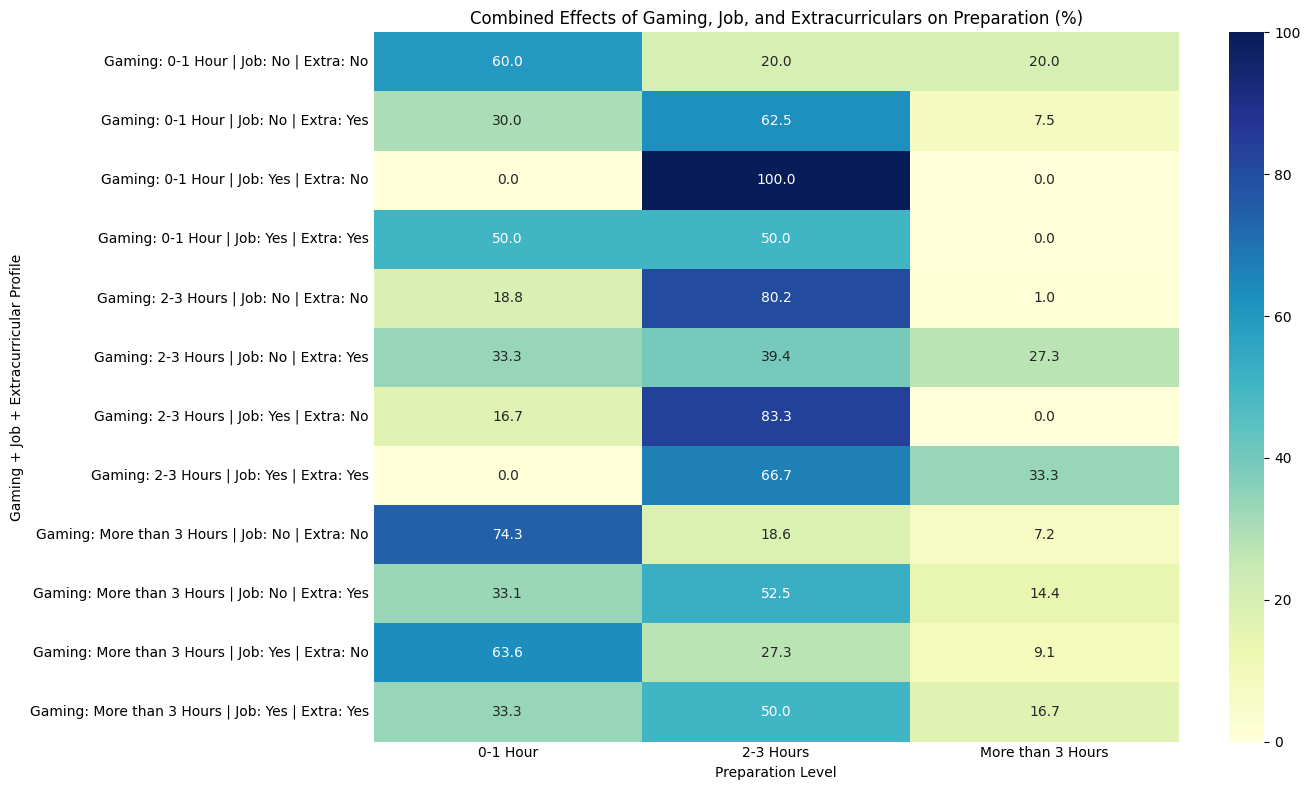

In [29]:
# Creates a Profile column with a combined set of Gaming, Job, and Extracurriculurs
df['Profile'] = ('Gaming: ' +
    df['Gaming'].astype(str) + ' | ' +
    'Job: ' + df['Job'].astype(str) + ' | ' +
    'Extra: ' + df['Extra'].astype(str)
)

prep_dist = df.groupby('Profile')['Preparation'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

contingency = pd.crosstab(df['Profile'], df['Preparation'])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print(f"Chi-square: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p}")

# Heatmap
heatmap_data = prep_dist.pivot(index='Profile', columns='Preparation', values='Percentage')
heatmap_data = heatmap_data.fillna(0)  # Replace NaN with 0

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Combined Effects of Gaming, Job, and Extracurriculars on Preparation (%)")
plt.xlabel("Preparation Level")
plt.ylabel("Gaming + Job + Extracurricular Profile")
plt.xticks(rotation=0)
plt.tick_params(axis='x', length=0)
plt.yticks(rotation=0)
plt.tick_params(axis='y', length=0)
plt.tight_layout()
plt.show()


#### Conclusion
The p-value of the Chi-squared test is less than .01, the value of α, which suggests that there is a significant relationship between the amount of time spent on gaming, jobs, and extracurriculurs and the amount of time spent on preparation.
Based off the heatmap, those who have an extracurricular tend to prepare for 2-3 hours most of the time. However, those who game for over 3 hours tend to prepare the least at around 0-1 hours, even if they have an extracurricular.

Otherwise, there does not appear to be a significant relation between time spent on preparation and time spent on gaming or having a job, as across all groups who devote time to gaming, a job, or an extracurricular, but game less than 2-3 hours, the time spent on preparation tends to be 2-3 hours.


### 2. Does the level of income have an impact on the computer proficiency level of a student? (α = 0.10)

##### $H_0$: There is no difference between the computer proficiencies of any of the students based on their levels of income.
##### $H_A$: There is a difference between at least one of the level of incomes due to computer proficiency.


#### Hypothesis 2 Introduction

While many attribute performance in school to talent or effort, many students are disadvantaged when coming into higher education as a result of their economic background.
There are some skills which are not taught in higher education, but still necessary for success.
In the digital age, chief among these skills is computer proficiency.
We were concerned with how income may impact the computer proficiency that students bring into their college education.
The dataset we selected stratified income into four categories: Low (Below 15,000 RM), Lower middle (15,000 - 30,000 RM), Upper middle (30,000 - 50,000 RM), and High (Above 50,000 RM).

We have displayed a box plot to provide a visual representation of how these income groups differ in terms of computer proficiency, but will explore the difference more concretely with a hypothesis test.

This hypothesis explores if there are significant differences in computer proficiency between the provided levels of income.
We will use an ANOVA test to compare the mean computer proficiency of the four income groups to determine whether there is a significant difference between them.
Then, we will perform a post-hoc analysis on the results of the ANOVA test, conducting Tukey's Honest Significant Difference test to identify which income groups differ from one another.


Income
High (Above 50,000)             3.519380
Low (Below 15,000)              3.310811
Lower middle (15,000-30,000)    3.161111
Upper middle (30,000-50,000)    3.436364
Name: Computer, dtype: float64


/var/folders/rs/fv7q9bln0tx2rdy0fhbblvsm0000gn/T/ipykernel_31136/4158073750.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=groups, y=value, data=df, palette='deep')


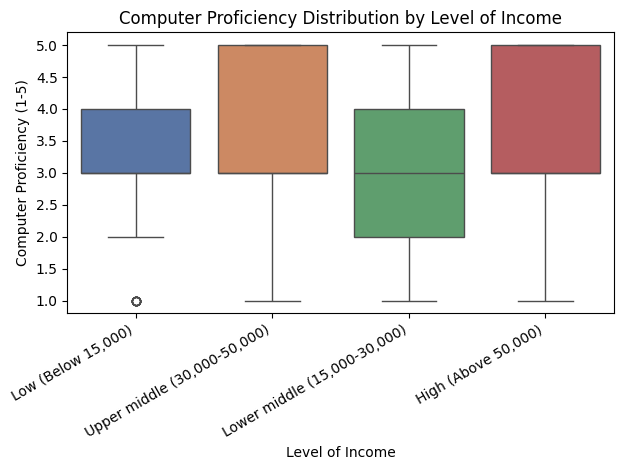

P-value for one-way ANOVA test: 0.0713386281485567
Post-Hoc (Tukey's HSD): Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.150     0.821    -0.295     0.594
 (0 - 2)     -0.126     0.909    -0.609     0.358
 (0 - 3)     -0.209     0.661    -0.678     0.261
 (1 - 0)     -0.150     0.821    -0.594     0.295
 (1 - 2)     -0.275     0.264    -0.665     0.114
 (1 - 3)     -0.358     0.063    -0.729     0.013
 (2 - 0)      0.126     0.909    -0.358     0.609
 (2 - 1)      0.275     0.264    -0.114     0.665
 (2 - 3)     -0.083     0.956    -0.500     0.334
 (3 - 0)      0.209     0.661    -0.261     0.678
 (3 - 1)      0.358     0.063    -0.013     0.729
 (3 - 2)      0.083     0.956    -0.334     0.500



In [30]:
groups = 'Income'
value = 'Computer'

summary = df.groupby(groups)[value].mean()
print(summary)


low = df[df[groups] == 'Low (Below 15,000)'][value]
low_mid  = df[df[groups] == 'Lower middle (15,000-30,000)'][value]
upper_mid = df[df[groups] == 'Upper middle (30,000-50,000)'][value]
high= df[df[groups] == 'High (Above 50,000)'][value]

# Box Plot & ANOVA Test - Post Hoc (Tukey's HSD)

# Boxpolot
sns.boxplot(x=groups, y=value, data=df, palette='deep')
plt.title("Computer Proficiency Distribution by Level of Income")
plt.xlabel("Level of Income")
plt.ylabel("Computer Proficiency (1-5)")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# ANOVA
p_value = stats.f_oneway(low, low_mid, upper_mid, high).pvalue
print(f"P-value for one-way ANOVA test: {p_value}")

# Post Hoc (Tukey's HSD)
tukey = stats.tukey_hsd(low, low_mid, upper_mid, high)
print(f"Post-Hoc (Tukey's HSD): {tukey}")

#### Conclusion

The p-value of our ANOVA test is less than 0.1, the value of α.
Since the p-value ≤α, it is unlikely that we would observe the results of this test if there was no difference between the computer proficiencies of students from different income level.
Thus, we reject the null hypothesis.

In regards to Tukey's Post-Hoc test, the p-values of all pairings are ≤α,
so we can conclude that there are differences between each income level in regards to computer proficiency.


### 3. Does the Highschool GPA correlate to College Overall GPA? (α = 0.05)

##### $H_0$: There is no a significant relationship between High School GPA and College GPA.
##### $H_A$: There is a significant relationship between High School GPA and College GPA.


#### Hypothesis 3 Introduction
Common sense would typically be that students who are more academically proficient in high school would be the same in college,
but do we have proof? Therefore, this hypothesis explores whether High School GPA is associated with the College Overall GPA.
Since these values are restricted to fixed ranges and not normally distributed, Spearman's Rank Coefficient is used to
evaluate the strength and direction of this relationship. This is then displayed on a Scatter Plot because it effectively
shows the relationshp between two variables that combine to academically make up one student.

Spearman's Rank Coefficient (rho) =  0.28651230272124145
p-value 9.061356278570244e-11


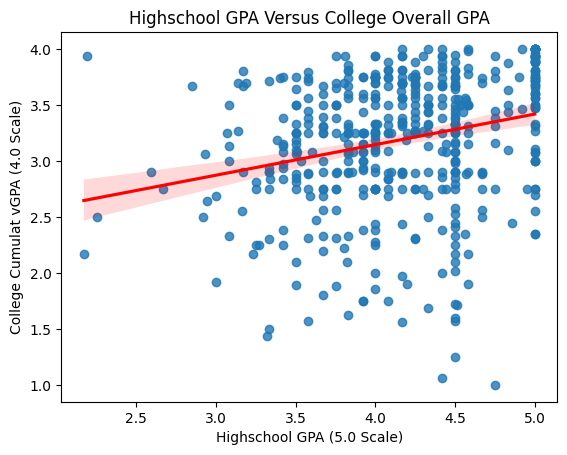

In [31]:
x_val = 'HSC'
y_val = 'Overall'
df_hyp3 = df[[x_val, y_val]]

rho, p = stats.spearmanr(df_hyp3[x_val], df_hyp3[y_val])
print("Spearman's Rank Coefficient (rho) = ", rho)
print("p-value", p)

#Scatter Plot & Regression Analysis & Spearman's Rank Correlation
sns.regplot(x=x_val, y=y_val, data=df_hyp3, line_kws={'color':'red'})
plt.title('Highschool GPA Versus College Overall GPA')
plt.xlabel('Highschool GPA (5.0 Scale)')
plt.ylabel('College Cumulat vGPA (4.0 Scale)')
plt.show()

#### Conclusion
The completion of the the Spearman's Rank Correlation test between High School GPA and College GPA
shows us that there is a somewhat weak but statistically significant relationship between the two features.
The p-value of approximately 9.0614e-11 is significantly below the alpha value of 0.05, which proves
that the two features are definatley related to each other. The Spearman's Rank Correltation Coefficient
of approximately 0.287 is positive, which indicates that higher High School GPAs lead to higher College GPAs.
Relatively speaking, 0.287 is weak, but the range of GPAs is overall not that large, mostly lying between
2 and 4, so this makes sense. Overall, we can reject the null hypothesis and conclude that students with higher
High School GPAs are more likely to have higher College GPAs and vice versa.


## Machine Learning
Goal: Using highschool information, predicting the cumulative college GPA.

Up to this point, we have seen how there are many different ways that the features in this dataset are correlated.
Therefore, it is feasible that we could use these features to predict useful information about students. Specificaliy,
we could predict students overall college GPA based off of all of the features they would have from high school. This would
allow students to have an idea of what kind of GPA they would have in college, or college admissions people to have an expectation
of what the students they will admit will have.


### Machine Learning Data Preparation
Before we train the models, we need to prepare the features to be accessible by the models we will test for
training. This will be done by encoding them all in to numbers. Overall, we have three different kinds of features.

First, we have numerical data, where the data is already float64s so no preperation needs to be done.

Next is the ordinal data, where they are categorical objects that have a hierarchy. For example, 3+ Hours of
preparation is greater than 1 hour. To prepare these, we use Label Encoding with maps to give tiered values
to each of the Categories.

Finally, there is categorical data, where they are categorical objects that don't have any type of hierarchy.
For example, we don't know if students in the Department of Busienss Administration are necessarily better
than those in Computer Science and Engineering. Therefore for those, we use One-Hot enconding to give them all
unique binary values that don't represent a specific hierarchy.

In [32]:
num_cols = df[['HSC', 'SSC']].copy()
cat_cols = df[['Department', 'Gender', 'Hometown', 'Job', 'Extra']].copy()
ord_cols = df[['Income', 'Computer', 'Preparation', 'Gaming', 'Attendance', 'English']].copy()

# One-hot encoding
encoder = OneHotEncoder()
cat_cols = encoder.fit_transform(cat_cols)
cat_cols = pd.DataFrame(cat_cols.toarray(),columns=encoder.get_feature_names_out(["Department", "Gender", "Hometown", "Job", "Extra"]))

scaler = StandardScaler()
num_cols = scaler.fit_transform(num_cols)
num_cols = pd.DataFrame(num_cols, columns=['HSC','SSC'])

income_map = {
    'Low (Below 15,000)':1,
    'Lower middle (15,000-30,000)':2,
    'Upper middle (30,000-50,000)':3,
    'High (Above 50,000)':4
    }

preparation_map = {
    '0-1 Hour':1,
    '2-3 Hours':2,
    'More than 3 Hours':3,
    }

gaming_map = {
    '0-1 Hour':1,
    '2-3 Hours':2,
    'More than 3 Hours':3,
    }

attendance_map = {
    'Below 40%':1,
    '40%-59%':2,
    '60%-79%': 3,
    '80%-100%':4,
    }


ord_cols["Income"] = ord_cols["Income"].map(income_map)
ord_cols["Preparation"] = ord_cols["Preparation"].map(preparation_map)
ord_cols["Gaming"] = ord_cols["Gaming"].map(gaming_map)
ord_cols["Attendance"] = ord_cols["Attendance"].map(attendance_map)

display(num_cols.head())
display(cat_cols.head())
display(ord_cols.head())

X = pd.concat([cat_cols, num_cols, ord_cols], axis=1)

# Overall is the numerical amount that we are trying to predict
Y = df['Overall']

# Splitting of data into testing and training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Function to create the scatter plots
def draw_scatter(Y_train, Y_train_pred, Y_test, Y_test_pred):
        plt.scatter(Y_train, Y_train_pred, color='blue', label='Train')
        plt.scatter(Y_test, Y_test_pred, color='orange', label='Test')
        plt.title("Predicted GPA vs Actual GPA")
        plt.xlabel("Actual GPA")
        plt.ylabel("Predicted GPA")
        plt.xlim(0, 5)
        plt.ylim(0, 5)
        plt.plot([0, 5], [0, 5], linestyle='-', color='black', label='Desired Spread')
        plt.legend()

,HSC,SSC
0,0.024224,0.207206
1,1.397978,0.665419
2,1.544511,0.178568
3,-0.287160,-0.766495
4,-3.602485,-4.575387


,Department_Business Administration,Department_Computer Science and Engineering,Department_Economics,Department_Electrical and Electronic Engineering,Department_English,"Department_Journalism, Communication and Media Studies",Department_Law and Human Rights,Department_Political Science,Department_Public Health,Department_Sociology,Gender_Female,Gender_Male,Hometown_City,Hometown_Village,Job_No,Job_Yes,Extra_No,Extra_Yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


,Income,Computer,Preparation,Gaming,Attendance,English
0,1,3,3,1,4,3
1,3,3,1,1,4,3
2,2,3,1,3,4,4
3,4,5,3,3,4,5
4,2,3,1,2,4,3


Based on our results of exploration, we initially tried a Linear Regression Model to help answer our questions posed in the introduction and we explored in our three Hypothesis, because of the numerical data that the GPA's were in.

However, after some testing, the results were unsatisfactory, so realizing the importance of the large number of categorical features, we decided to choose a Random Forest Regression technique instead, and as a result, this type of regression produced a greater r2 value and a lower mean squared error than using Linear Regression. Our central goal is to predict a continuous outcome variable, which is the cumulative college GPA; we plan on doing this by leveraging a majority of the explanatory variables such as High School GPA, income, and other student attributes. Unlike simple correlational analysis, this regression model aims to incorporate the features in order to evaluate whether prior academic, socioeconomic, and behavioral factors are able to accurately predict college performance. This enables us to move beyond just identifying isolated relationships and focus on the influence of multiple variables to see how educational inequality varies in different outcomes.

# Linear Regression Model

We can start implementing our preprocessed data into a model to test it. First, we tried a linear regression model, as it was a simple model that could handle a large amount of numerical features easily.



## Hypothesis Testing

Current Model: LinearRegression
Train - MSE: 0.1526, R^2: 0.5558
Test - MSE: 0.2208, R^2: 0.4085



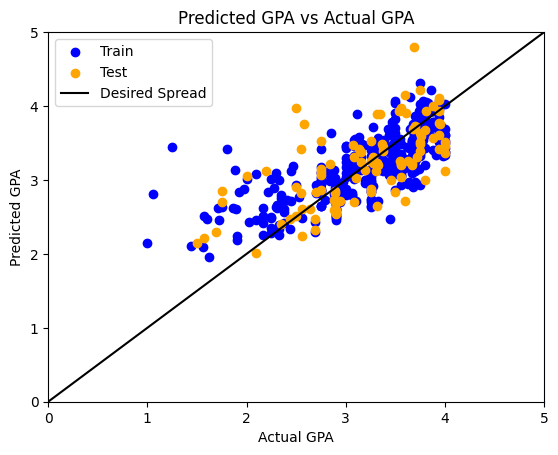

In [33]:
model = LinearRegression().fit(X_train, Y_train)

# Predictions from the Model
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Evaluations of model
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print(f"Current Model: LinearRegression")
print(f"Train - MSE: {mse_train:.4f}, R^2: {r2_train:.4f}")
print(f"Test - MSE: {mse_test:.4f}, R^2: {r2_test:.4f}\n")

draw_scatter(Y_train, Y_train_pred, Y_test, Y_test_pred)

#Linear Regression Results and Plot Analysis

Here is a graph that plots a comparison between the Predicted GPAs and the Acutal GPAs of both the Training and Testing Data. Ideally, the data (in particular, the training data) would be as close around the line as possible. We can see here that the trend of the points are generally around the line, but it is still not great and has quite a few outliers. This lines up with the MSE and R^2 scores which are decent, but still has room for improvement.

This makes sense because linear regression does not effectively handle the  non-linear effects that some of the features may have. For example, the jump from studying 0-1 hours to 2-3 hours may be larger than 2-3 to 3+. Also there are 5 categorical columns that were encoded with One-Hot Encoding that linear regression doesn't effectively handle. With all these different kinds of data, something more like Random Forest Regressor may be more effective.


# Random Forest Regressor Model

Model: RandomForestRegressor; Number of trees: 125
Train - MSE: 0.0221, R^2: 0.9357
Test - MSE: 0.1536, R^2: 0.5885



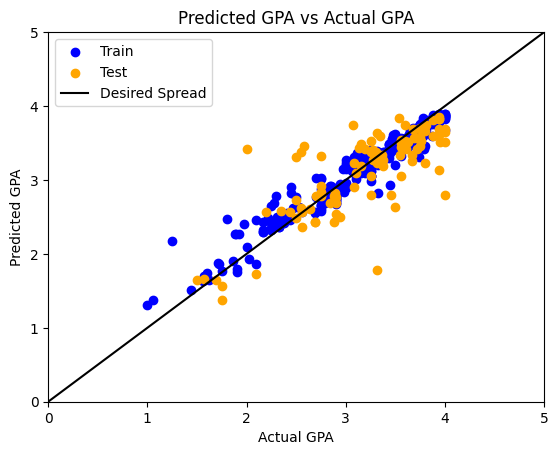

In [34]:
model = RandomForestRegressor(n_estimators=125, max_depth=None, random_state=42).fit(X_train, Y_train)

# Predictions from the Model
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Evaluations of model
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print(f"Model: RandomForestRegressor; Number of trees: {125}")
print(f"Train - MSE: {mse_train:.4f}, R^2: {r2_train:.4f}")
print(f"Test - MSE: {mse_test:.4f}, R^2: {r2_test:.4f}\n")

draw_scatter(Y_train, Y_train_pred, Y_test, Y_test_pred)

#Random Forest Regressor Results and Plot Analysis



# ANALYZE Visual and MSE + R2

Here is a similar graph to previous, just with the results from the Random Tree Regressor. As you can see, the test data ponts (as well as the training data points) are considerably closer to the spread line, which means the predicted GPAs are considerably closer to their actual GPAs than when using Linear Regression. This lines up with the MSEs and R^2 data points, which are better across the board.

This improvement makes because Random Forests are able to capture nonlinear patterns, threshold effects and more complicated interactions between variables. These are all aspects that are prevalent within student performance data that Linear Regression is not able to pick up. This leads to predictions from the Random Forest Regressor producing predictions that are more accurate as shown by these results.


## Feature Importance Plots

In [35]:
print(X.columns)

# Grouping:
group_map = {
    "Department_": "Department",
    "Gender_": "Gender",
    "Extra_": "Extra",
    "Job_": "Job",
    "Hometown_": "Hometown"
}


def group_importances(importances, feature_names, group_map):
    grouped = {}

    for feat, imp in zip(feature_names, importances):
        matched = False

        for prefix, group_name in group_map.items():
            if feat.startswith(prefix):
                grouped[group_name] = grouped.get(group_name, 0) + imp
                matched = True
                break

        if not matched:
            grouped[feat] = grouped.get(feat, imp)

    return grouped

Index(['Department_Business Administration',
       'Department_Computer Science and Engineering', 'Department_Economics',
       'Department_Electrical and Electronic Engineering',
       'Department_English',
       'Department_Journalism, Communication and Media Studies',
       'Department_Law and Human Rights', 'Department_Political Science',
       'Department_Public Health', 'Department_Sociology', 'Gender_Female',
       'Gender_Male', 'Hometown_City', 'Hometown_Village', 'Job_No', 'Job_Yes',
       'Extra_No', 'Extra_Yes', 'HSC', 'SSC', 'Income', 'Computer',
       'Preparation', 'Gaming', 'Attendance', 'English'],
      dtype='object')


Because of how we set up the features for the models, we needed to group the individual options of categorical features together in order to determine the cumulative effect these features had on the model. For example, the yes/no options of the Job feature, or the multiple Departments listed, all needed to be combined into Job and Department features. In order to do this we separated the features by name and combined them to create the larger bins for the Feature Importance Plots.

## Grouped Feature Importance

/var/folders/rs/fv7q9bln0tx2rdy0fhbblvsm0000gn/T/ipykernel_31136/2657803070.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x="Importance", y="Feature", palette="viridis")


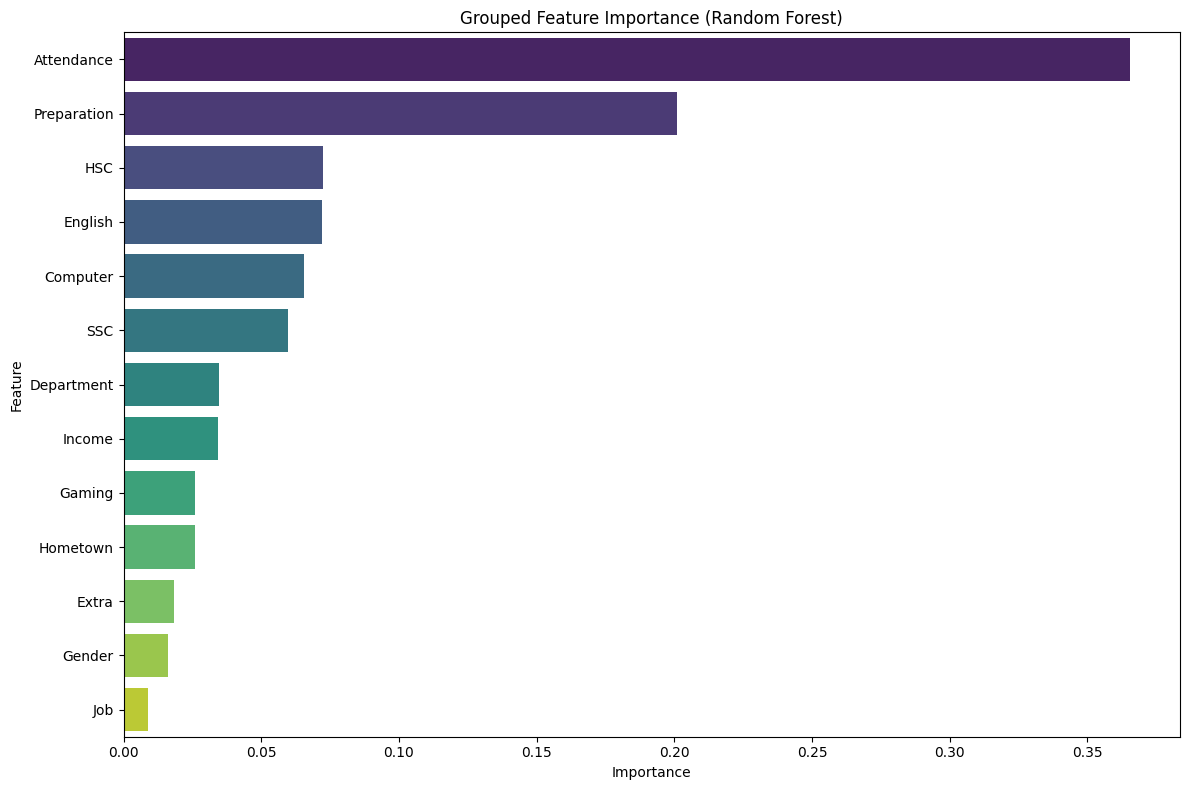

In [36]:
importances = model.feature_importances_
feature_names = X.columns

grouped_fi = group_importances(importances, feature_names, group_map)

fi_df = pd.DataFrame({
    "Feature": list(grouped_fi.keys()),
    "Importance": list(grouped_fi.values())
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=fi_df, x="Importance", y="Feature", palette="viridis")
plt.title("Grouped Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

From this basic feature importance test, we can get an idea of the affect each feature has on the model readout.
The grouped feature importance plot shows a clear hierarchy in the features for the Random Forest's model, showing that behavioral academic habits drive GPA predictions more than any other category. Attendance and Preparation are at the very top of the model. Academic background variables like HSC, English proficiency, Computer proficiency, and SSC form the middle tier, so prior achievement and core skills meaningfully inform the performance, but not as much as engagement behaviors. Below those are factors such as Department, Income, and Hometown showing subtle differences across socioeconomic contexts but not as much compared to direct study habits. Finally, variables like Gaming, Extracurriculars, Gender, and Job status are at the bottom, implying that once real academic and behavioral indicators are accounted for, these attributes hardly affect GPA outcomes.

## Permutation Feature Importance

/var/folders/rs/fv7q9bln0tx2rdy0fhbblvsm0000gn/T/ipykernel_31136/1995842826.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=perm_df, x="Importance", y="Feature", palette="magma")


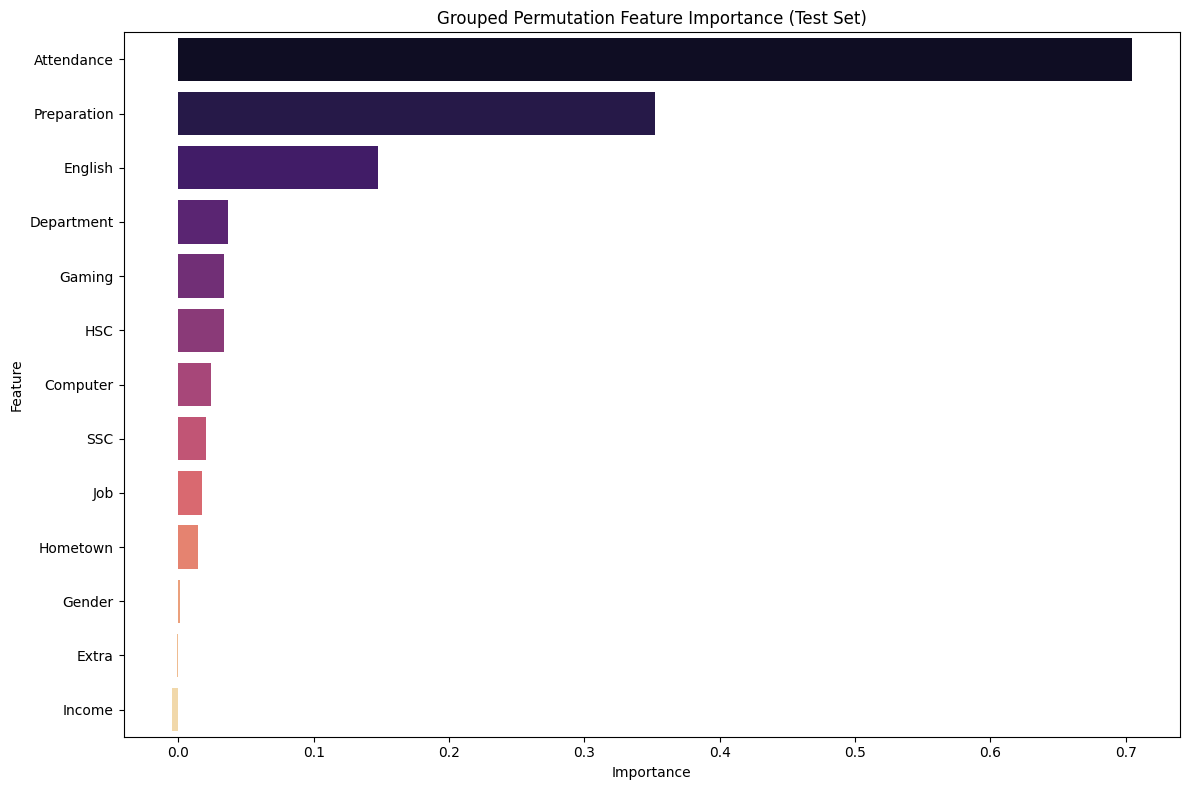

In [37]:
perm = permutation_importance(model, X_test, Y_test, n_repeats=10, random_state=42)
perm_importances = perm.importances_mean

grouped_perm = group_importances(perm_importances, feature_names, group_map)

perm_df = pd.DataFrame({
    "Feature": list(grouped_perm.keys()),
    "Importance": list(grouped_perm.values())
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=perm_df, x="Importance", y="Feature", palette="magma")
plt.title("Grouped Permutation Feature Importance (Test Set)")
plt.tight_layout()
plt.show()

The grouped permutation feature importance plot tells which variables matter more to the model by seeing how much accuracy decreases when each feature is randomly shuffled. Attendance is on top again, and it's even more dominant than the previous plot. Preparation is still second place, and it still indicates that consistent study habits are absolutely necessary. However here a new feature arises. English proficiency comes out as a stronger contributor under permutation importance than under the previous plot, implying that language meaningfully affects the model's generalization on unseen data. Mid-level features like Gaming, Department, HSC, Computer, SSC, Job, and Hometown show noticeably smaller drops in performance, suggesting they carry real but shallow usefulness. Once again at the bottom, variables such as Gender, Extracurriculars, and Income produce negligible performance loss when shuffled. Overall, this plot reveals which features the model truly depends on when facing new data.

## Partial Dependence Plots

/Users/ahteshamalvi/Files/CMSC/CMSC 320/Education-Inequality-320/.venv/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 24 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/Users/ahteshamalvi/Files/CMSC/CMSC 320/Education-Inequality-320/.venv/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 22 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-lear

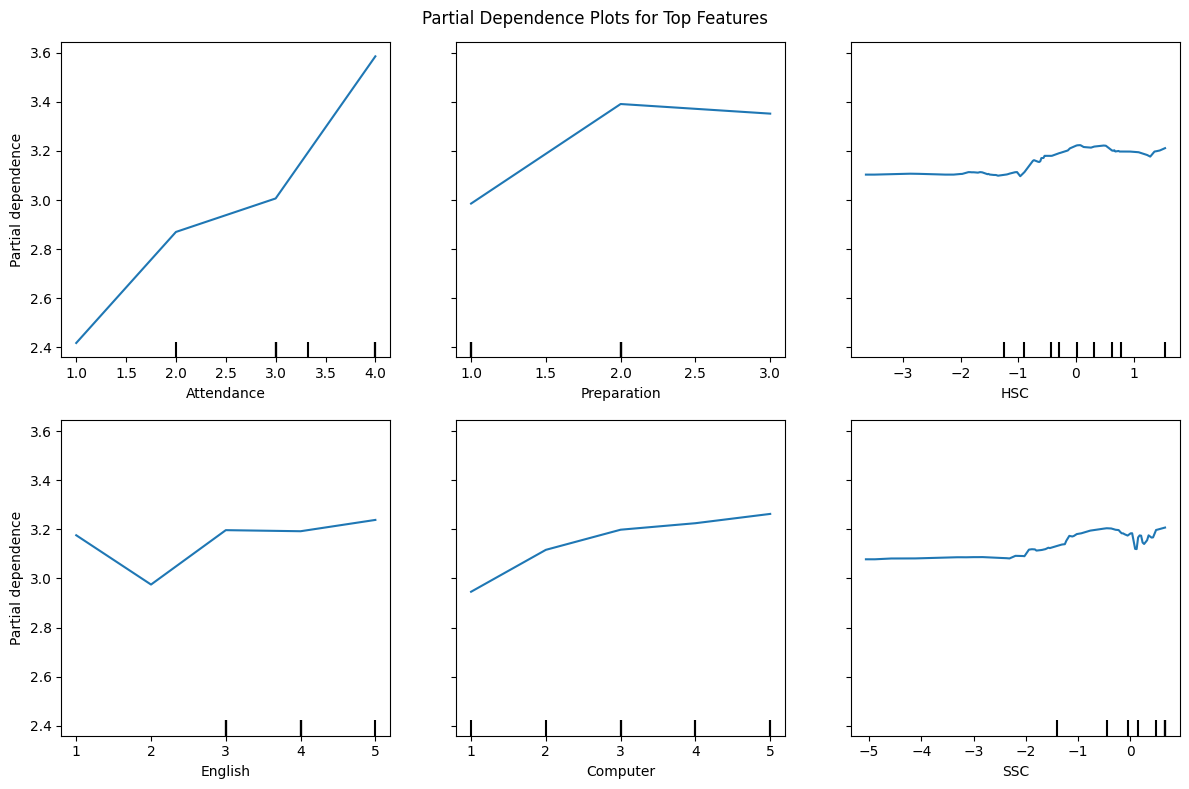

In [38]:
importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance (descending)
indices = importances.argsort()[::-1]
sorted_features = feature_names[indices]

important_features = sorted_features[:6]  # top 3 features

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(model, X, important_features, ax=ax)
plt.suptitle("Partial Dependence Plots for Top Features")
plt.tight_layout()
plt.show()


This set of partial dependence plots of the six most influential features allows us to see how the model thinks each feature affects academic performance. Attendance and Preparation both show strong, upward relationships: GPA predictions rise sharply as attendance increases from low to high, showing consistent presence in class directly promotes better academic outcomes. Preparation shows a similar lift from minimal to moderate study time but declines at the highest category, suggesting diminishing returns or noise at the top end. HSC, standardized, has a smooth increasing curve, meaning that historical academic strength contributes positively yet subtly to GPA predictions, with no large jumps. SSC is similar to HSC with a steady but very shallow rise, reinforcing that secondary-school academic indicators hold predictive value but are still secondary. English shows lower English scores correlate with lower predicted GPAs, mid-level scores dip slightly, and higher scores recover a bit, indicating that the model sees some benefit from stronger language proficiency. Computer proficiency has a more straightforward upward trend, with GPA predictions gradually improving as digital competency increases. These plots show that behavioral engagement exerts the clearest and strongest influence, while skill-based and background academic features shape GPA predictions more gradually.

# Conclusion

Taken together, our statistical tests and machine learning analyses ultimately show a picture of the factors shaping college GPA. The report put together shows that academic background, socioeconomic context, and day-to-day student behaviors interact in significant but uneven ways.

The hypothesis testing showed that habits like gaming, working, and participating in extracurricular activities did significantly influence preparation time (χ², p < 0.01), with heavy gamers preparing the least and students involved in extracurriculars preparing at moderate levels. Income level also proved significant, especially in relation to computer proficiency (ANOVA, p < 0.10), suggesting that higher-income students enter college with stronger digital skills, showing advantages based in societal factors. High school GPA correlated positively, though weakly, with college GPA, reinforcing that prior academic performance remained a somewhat reliable signal of later achievement.

Our machine learning analysis furthered this understanding. The Random Forest Regressor significantly outperformed Linear Regression, achieving a test R² of 0.6128, and while the large gap between training and testing performance indicated overfitting, the model still demonstrated that high school, demographic, and behavioral data could produce moderately accurate GPA predictions.

Afterwards, the analysis using the grouped feature importance and permutation importance revealed that behavioral engagement (Attendance and Preparation) far outweighed all other predictors. Academic skills such as English proficiency, computer literacy, and high school grades did contribute meaningfully, but at a much lower magnitude. Surprisingly, socioeconomic and demographic indicators, including income, gender, hometown, and extracurricular involvement, contributed only modestly once core academic habits were accounted for. The partial dependence plots further clarified these relationships, showing strong increases in predicted GPA as attendance and preparation rose, mild increases from high school scores and computer skills, and comparatively weak effects in other predictors.

Together, these findings suggest that although structural and historical factors shape student outcomes, academic engagement during college is by far the strongest predictor of cumulative GPA. This means that predictive models and those leveraging them may gain the most value not by targeting fixed background variables but by allowing institutions to intervene on attendance, study time, and academic preparedness to improve student success.